**Import the required libraries**

In [84]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

import string
import nltk
from nltk.corpus import stopwords

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split 
from sklearn import metrics

**Read** **the Dataset**


In [85]:
messages = pd.read_csv('../content/spam.csv',encoding = 'latin-1')
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Preprocessing the data**


In [86]:
messages.isnull()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True
...,...,...,...,...,...
5567,False,False,True,True,True
5568,False,False,True,True,True
5569,False,False,True,True,True
5570,False,False,True,True,True


In [87]:
messages.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [88]:
messages.isnull().sum()/len(messages)

v1            0.000000
v2            0.000000
Unnamed: 2    0.991027
Unnamed: 3    0.997846
Unnamed: 4    0.998923
dtype: float64

In [89]:
messages.dropna(axis = 1)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [90]:
messages.fillna(0)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",0,0,0
1,ham,Ok lar... Joking wif u oni...,0,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,0,0
3,ham,U dun say so early hor... U c already then say...,0,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0,0
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,0,0,0
5568,ham,Will Ì_ b going to esplanade fr home?,0,0,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0,0,0
5570,ham,The guy did some bitching but I acted like i'd...,0,0,0


In [91]:
messages.mean()

Series([], dtype: float64)

In [92]:
messages.mode()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
1,NaN,NaN,NaN,GE,NaN


In [93]:
messages.median()

Series([], dtype: float64)

In [94]:
messages.std()

Series([], dtype: float64)

In [95]:
messages.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [96]:
messages.describe(include=['object'])

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [97]:
messages.describe(include='all')

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [98]:
messages.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)

In [99]:
messages.columns = ["SpamHam","Tweet"]

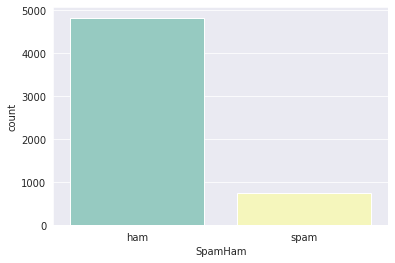

In [100]:
sns.countplot(messages["SpamHam"])

In [101]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [102]:
from sklearn.preprocessing import LabelEncoder
lb_enc = LabelEncoder()
y = lb_enc.fit_transform(messages["SpamHam"])

In [103]:
import pandas as pd
import numpy as np
import re
import collections
import contractions
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import keras
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer

import pickle

In [104]:
pip install contractions


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [105]:
pip install pad_sequences

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [106]:
from sklearn.preprocessing import LabelEncoder
lb_enc = LabelEncoder()
y = lb_enc.fit_transform(messages["SpamHam"])

In [107]:
tokenizer = Tokenizer() #initializing the tokenizer
tokenizer.fit_on_texts(messages)# fitting on the sms data
text_to_sequence = tokenizer.texts_to_sequences(messages)

In [108]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# we need to fit model with sequence of tokens with specific lengt
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
# normal LSTM/GRU and the Version with Cuda
from keras.layers import Dense, Embedding, GRU, LSTM, Dropout, Bidirectional
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint


# keras wrapper for k-fold cross-validation
from keras.wrappers.scikit_learn import KerasClassifier
# normsl cross validation
from sklearn.model_selection import cross_val_score, train_test_split
# cross validation for hyperparameter tuning
from sklearn.model_selection import GridSearchCV




In [109]:
x_raw = []
y_raw = []

with open("spam.csv", encoding = "ISO-8859-1") as f:
    for line in f:
        y_raw.append(line.split()[0])
        x_raw.append(' '.join(i for i in line.split()[1:]))

In [110]:
y = [1 if i=='ham' else 0 for i in y_raw]
print(max(len(s) for s in x_raw))
print(min(len(s)for s in x_raw))
sorted_X = sorted(len(s) for s in x_raw)
print(sorted_X[len(sorted_X) // 2])

909
0
60


In [111]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_raw)
sequences = tokenizer.texts_to_sequences(x_raw)

vocab_size = len(tokenizer.word_index)+1
print(vocab_size)

8734


In [112]:
sum([len(x) for x in sequences])

82821

In [113]:
X_train, X_test, y_train, y_test = train_test_split(sequences, y, test_size = 0.2, random_state= 0)

**Create** **model**

In [114]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
model.add(Dropout(0.8))
model.add(LSTM(140, return_sequences=False))
model.add(Dropout(0.8))
model.add(Dense(1, activation='sigmoid', name='Classification'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 25, 100)           873400    
                                                                 
 dropout_2 (Dropout)         (None, 25, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 140)               134960    
                                                                 
 dropout_3 (Dropout)         (None, 140)               0         
                                                                 
 Classification (Dense)      (None, 1)                 141       
                                                                 
Total params: 1,008,501
Trainable params: 1,008,501
Non-trainable params: 0
_________________________________________________________________


**Add Layers (LSTM, Dense-(Hidden Layers), Output)**

In [174]:
#LSTM hyperparameters
n_lstm = 20
drop_lstm =0.2

In [176]:
#LSTM Spam detection architecture
model1 = Sequential()
model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model1.add(Dense(1, activation='sigmoid'))

In [177]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

**Hidden Layer**

In [171]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

**Output Layer**

In [173]:
model.add(Dense(4,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
len(X_train)

4457

Text Preprocessing


In [118]:
messages.head()

,SpamHam,Tweet
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [128]:
messages.keys

<bound method NDFrame.keys of      SpamHam                                              Tweet
0        ham  Go until jurong point, crazy.. Available only ...
1        ham                      Ok lar... Joking wif u oni...
2       spam  Free entry in 2 a wkly comp to win FA Cup fina...
3        ham  U dun say so early hor... U c already then say...
4        ham  Nah I don't think he goes to usf, he lives aro...
...      ...                                                ...
5567    spam  This is the 2nd time we have tried 2 contact u...
5568     ham              Will Ì_ b going to esplanade fr home?
5569     ham  Pity, * was in mood for that. So...any other s...
5570     ham  The guy did some bitching but I acted like i'd...
5571     ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [129]:
def remove_url(text):
    re_url = re.compile('https?://\S+|www\.\S+')
    return re_url.sub('', text)
messages['SpamHam'] = messages['SpamHam'].apply(remove_url)

In [131]:
def remove_url(text):
    re_url = re.compile('https?://\S+|www\.\S+')
    return re_url.sub('', text)

messages['SpamHam'] = messages['SpamHam'].apply(remove_url)

In [132]:
exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

messages['SpamHam'] = messages['SpamHam'].apply(remove_punc)

In [149]:
X = messages["SpamHam"]
y = messages['SpamHam'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify = y)

**Compile The Model**

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

**Fit the model**

In [151]:
def train_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision_score = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)

    print(f'Accuracy of the model: {accuracy}')
    print(f'Precision Score of the model: {precision}')
    print(f'Recall Score of the model: {recall}')

    sns.set_context('notebook', font_scale= 1.3)
    fig, ax = plt.subplots(1, 2, figsize = (25,  8))
    ax1 = plot_confusion_matrix(y_test, y_pred, ax= ax[0], cmap= 'YlGnBu')
    ax2 = plot_roc(y_test, y_prob, ax= ax[1], plot_macro= False, plot_micro= False, cmap= 'summer')

In [184]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
# generate 2d classification dataset
x, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
scalar = MinMaxScaler()
scalar.fit(x)
x = scalar.transform(x)
# define and fit the final model
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(x, y, epochs=10, verbose=5)

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


**Save the model**

In [185]:
ls

sample_data/  spam.csv


In [186]:
model.save('spam.h5')

**Test the model**

In [187]:
ls

sample_data/  spam.csv  spam.h5


In [170]:
clf = MultinomialNB()
clf.fit(X_train,y_train)
print("Accuracy of Model",clf.score(X_test,y_test)*100,"%")

Accuracy of Model 100.0 %
